In [ ]:
Case Study
Objectives:
1.Provide the learner some more practice for exploratory data analysis.
2.Equip the learner to fit and evaluate a linear regression model.

In [ ]:
Questions:
1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content 
across different cereals.
[Hint: Extract values of a specific column using their labels and use hist method of 
pyplot]


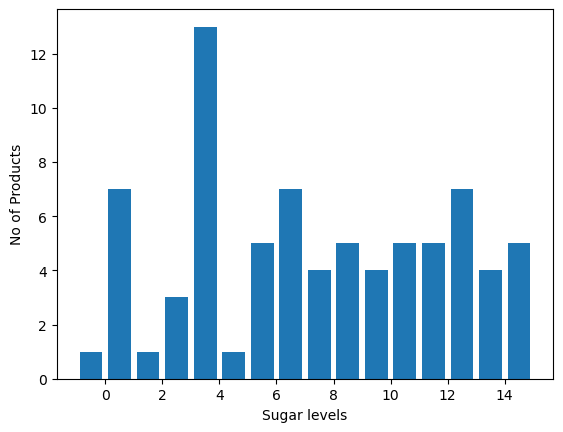

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cereal = pd.read_csv('cereal.csv')
plt.hist(cereal['sugars'],np.sort(cereal['sugars'].unique()), histtype='bar', rwidth=0.8)
plt.xlabel("Sugar levels")
plt.ylabel("No of Products")
plt.show()

In [10]:
np.sort(cereal['vitamins'].unique())

array([  0,  25, 100], dtype=int64)

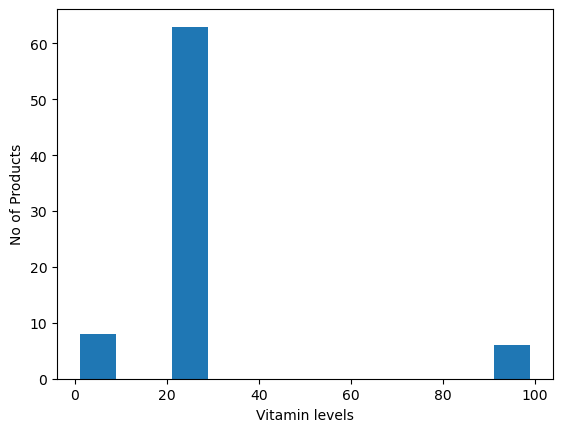

In [11]:
cereal = pd.read_csv('cereal.csv')
plt.hist(cereal['vitamins'], histtype='bar', rwidth=0.8)
plt.xlabel("Vitamin levels")
plt.ylabel("No of Products")
plt.show()

In [12]:
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
2. The names of the manufactures are coded using alphabets, create a new column 
with their full name using the below mapping.
'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'
Create a bar plot where each manufacturer is on the y axis and the height of the bars 
depict the number of cereals manufactured by them.
[Hint: Try using countplot this time or bar method of pyplot

In [13]:
Manufacturers = {'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'}

cereal['Manufacturer']=np.NaN
for i in Manufacturers:
    cereal.loc[cereal['mfr']==i,['Manufacturer']]=Manufacturers[i]

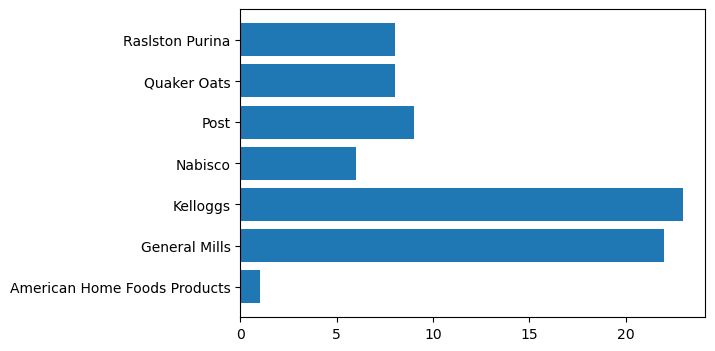

In [14]:
Manufacturer_GroupBy =cereal.groupby('Manufacturer')
Mfs =Manufacturer_GroupBy['name'].count()
#Mfs.keys()
#Manufacturer_GroupBy
plt.figure(figsize=(6,4))
plt.barh(Mfs.keys(),Mfs.values)
plt.show()

In [ ]:
3. Extract the rating as your target variable ‘y’ and all numerical parameters as your 
predictors ‘x’. Separate 25% of your data as test set.

In [15]:
xcolumns =cereal.describe().columns
x = cereal[xcolumns.drop('rating')]
y = cereal['rating']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=0)



In [ ]:
4. Fit a linear regression module and measure the mean squared error on test 
dataset.
[ Hint: Explore linear models and metrics section of sklearn documentation

In [22]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [28]:
predictions = model.predict(x_test)


In [48]:
from sklearn import metrics
import math

print("MSE:",metrics.mean_squared_error(y_test,predictions))
print(format(1.4013894266411208e-13,'.1E'))


MSE: 1.4013894266411208e-13
1.4E-13


In [40]:
pd.DataFrame({'Actual':y_test, 'Prediction':predictions})

,Actual,Prediction
48,29.924285,29.924285
74,49.787445,49.787445
59,39.703400,39.703400
54,60.756112,60.756112
34,45.811716,45.811716
26,58.345141,58.345142
68,59.363993,59.363994
33,53.371007,53.371007
45,34.139765,34.139764
69,38.839746,38.839745
